In [1]:
from utils import load_parquet_to_df_list


path = "../../../../0_data/synth_pattern_data_for_synth_drive_generation"
df_list = load_parquet_to_df_list(path)

# do not use metadata of time series
df_orig = [df["dim_0"].to_frame() for df in df_list]

In [2]:
df_orig[0]

,dim_0
0,70.902463
1,70.282942
2,68.703804
3,64.193219
4,60.321183
...,...
896,79.357289
897,88.933892
898,83.036114
899,85.052833


In [3]:
from utils import z_normalize


# additionally cut of some time series for a shorter representation
df_norm = [z_normalize(df) for df in df_orig[:3]]
num_dfs = len(df_norm)

In [4]:
from discretization.sax.sax import SAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.persist.persist import Persist


alphabet_size = 10
alphabet_size_slope = 8

sax = SAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size, alphabet_size_slope)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
persist = Persist(alphabet_size)

### Brute Force Algorithm

### Params for Brute Force algorithm

In [5]:
window_size = 5
sax_variant = sax
num_compare_segments = 4
p = 1.0
dist_threshold = 100
num_diff_threshold = 1
hamming_threshold = 0
ignore_trivial = True
exclusion_zone = 1

### Find motifs

In [6]:
from pattern_recognition.motif_discovery.brute_force.discretized import do_brute_force_discretized

motifs = [do_brute_force_discretized(df_ts, window_size, sax_variant, num_compare_segments, dist_threshold, num_diff_threshold, hamming_threshold, p, ignore_trivial, exclusion_zone)
          for df_ts in df_norm]
motifs_lst, start, end = motifs[0]

motif: [0, 95]
trivial: [1, -1, 96, 94]
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: [9, 20]
trivial: [10, 8, 21, 19]
motif: [10, 109, 119, 127, 175]
trivial: [11, 9, 110, 108, 120, 118, 128, 126, 176, 174]
motif: [11, 110, 176]
trivial: [12, 10, 111, 109, 177, 175]
motif: [12, 111]
trivial: [13, 11, 112, 110]
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: [9, 20]
trivial: [10, 8, 21, 19]
motif: [21, 64]
trivial: [22, 20, 65, 63]
motif: [22, 65]
trivial: [23, 21, 66, 64]
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: []
trivial: []
motif: [31, 131]
trivial: [32, 30, 132, 130]
motif: [32, 132, 167]
trivial: [33, 31, 133, 131, 1

In [7]:
motifs_lst[0]

[[10, 109, 119, 127, 175],
 [34, 42, 134, 156],
 [32, 132, 167],
 [0, 95],
 [12, 111],
 [21, 64],
 [136, 150]]

### Highlight motif within time series

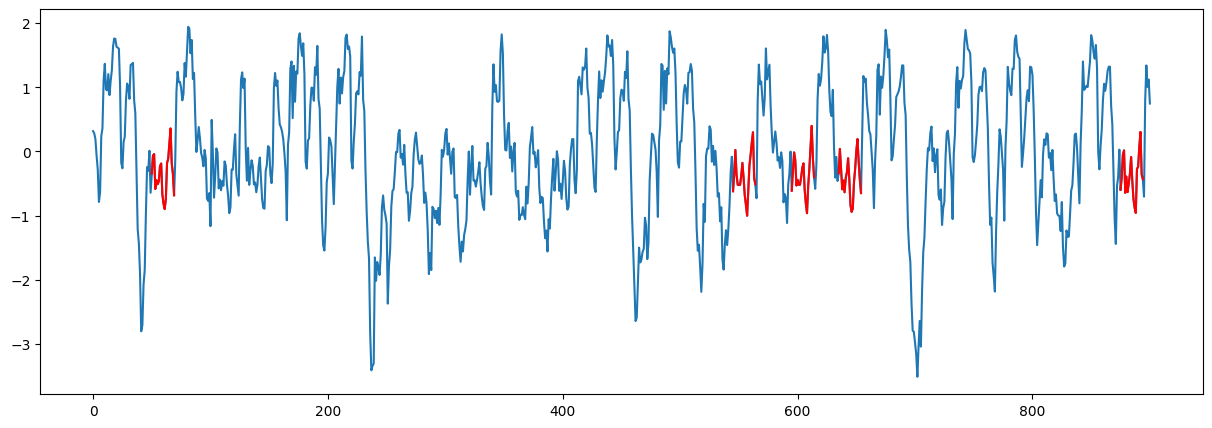

In [8]:
from pattern_recognition.motif_discovery.graphics import highlight_motif


highlight_motif(df_norm[0], start, end, motifs_lst[0][0], 0)